# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [31]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn import preprocessing

%matplotlib inline

### Step 2: Read in your data set 

In [6]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [7]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations in the dataset.

#### Question 2. Create a summary table

In [10]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE score has a range from 220-800. GPA has a range of 1-4. The larger magnitude of the numbers in gre leads to there being a higher variance in the data.

#### Question 4. Drop data points with missing data


In [13]:
#testing or the values that are null
pd.isnull(df_raw)

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [16]:
df = df_raw.dropna()
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The number of rows has dropped from 400 to 397, so my intuition tells me that the values were correctly dropped. All of the variables should have the same number of observations. I can use a count method to see if this is true.

In [29]:
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

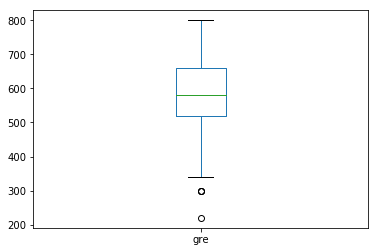

In [20]:
#boxplot 1
df['gre'].plot(kind='box')
#df.plot(kind='box')
#df[['gre','admit']].plot(kind='box').set_ylim([0,200])


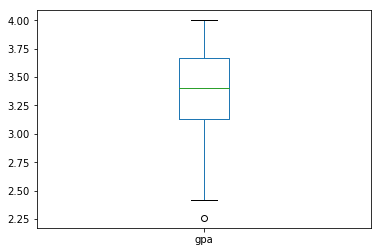

In [21]:
#boxplot 2 
df['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The top of the box shows the 75 percentile , the middle line is the 50 percentile (median), and the bottom line is the 25 percentile.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11be2b2d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bc23410>]], dtype=object)

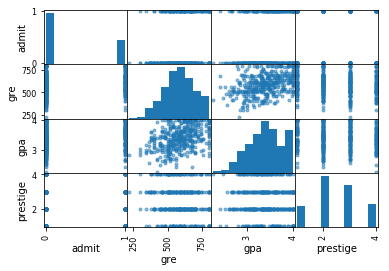

In [22]:
# plot the distribution of each variable 
pd.scatter_matrix(df)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [25]:
df.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

In [26]:
df.kurtosis()

admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64

Answer: Our model would not meet the assumption because the data is skewed and they all of kurtosis less than 3.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Yes it does. GPA, GRE, and Prestige should be normalized.

In [44]:
preprocessing.normalize(df)

array([[ 0.        ,  0.99992372,  0.00949928,  0.00789413],
       [ 0.00151511,  0.99997306,  0.00556046,  0.00454533],
       [ 0.00124998,  0.99998594,  0.00499993,  0.00124998],
       ..., 
       [ 0.        ,  0.9999742 ,  0.00571724,  0.00434771],
       [ 0.        ,  0.99998232,  0.00521419,  0.00285709],
       [ 0.        ,  0.99996648,  0.00648312,  0.00499983]])

#### Question 11. Which of our variables are potentially colinear? 

In [45]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer:  There is a chance of that gpa and gre are potentially colinear because they have a correlation of .382.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1) Create a hypothesis for each one.
2) Perform a linear regression

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that GRE score has the largest impact on whether or not someone is admitted.

## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    6a. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?

1. Test error is the errors you obtain when you use models that have been trained. In other words, how far off the predicted values are the actual values. Train errors are the errors obtained when using the trained model on the same training set. It's acceptable to have some error because it indicates that there is not overfit.
2. A way to mitigate a high test error and a low train error is through k-fold cross validation. Alternatively, you can use regularization, which is adding a penalty variable.
3. You can use cross-validation to determine the best possible fit for a given set of data.
4. You could use the sklearn package and more specifically the gridsearch function to determine the best model to fit your data.
5. Lasso and Ridge regressions are used to minimize overfitting of data due to overly complicated models. Lasso makes it possible for the coefficients to become 0, which simplifies the model. 
6. An alternative to dropping observations with the missing data would be to fill in the datapoints with estimations of what each value should be.

Advanced Bonus:
1. Lasso regression is minimizing the function using an absolute value as the penalty function.
2. In order to determine multi-collinearity when performing a linear regression, you can use the Variance Inflation Factor.

